# Lecture 6 - Distances between Observations

In [1]:
import pandas as pd

# This overrides how Colab displays Pandas Series.
#from google.colab import _reprs
#_reprs.disable_pandas_series_repr()

df = pd.read_table("https://datasci112.stanford.edu/data/housing.tsv")
df

PID  Gr Liv Area  Bedroom AbvGr  Full Bath  Half Bath  \
0     526301100         1656              3          1          0   
1     526350040          896              2          1          0   
2     526351010         1329              3          1          1   
3     526353030         2110              3          2          1   
4     527105010         1629              3          2          1   
...         ...          ...            ...        ...        ...   
2925  923275080         1003              3          1          0   
2926  923276100          902              2          1          0   
2927  923400125          970              3          1          0   
2928  924100070         1389              2          1          0   
2929  924151050         2000              3          2          1   

      MS SubClass MS Zoning  Lot Frontage  Lot Area Street  ... Pool Area  \
0              20        RL         141.0     31770   Pave  ...         0   
1              20        RH          80.0     11622   Pave  ...         0   
2              20        RL          81.0     14267   Pave  ...         0   
3              20        RL          93.0     11160   Pave  ...         0   
4              60        RL          74.0     13830   Pave  ...         0   
...           ...       ...           ...       ...    ...  ...       ...   
2925           80        RL          37.0      7937   Pave  ...         0   
2926           20        RL           NaN      8885   Pave  ...         0   
2927           85        RL          62.0     10441   Pave  ...         0   
2928           20        RL          77.0     10010   Pave  ...         0   
2929           60        RL          74.0      9627   Pave  ...         0   

     Pool QC  Fence Misc Feature Misc Val Mo Sold Yr Sold Sale Type  \
0        NaN    NaN          NaN        0       5    2010       WD    
1        NaN  MnPrv          NaN        0       6    2010       WD    
2        NaN    NaN         Gar2    12500       6    2010       WD    
3        NaN    NaN          NaN        0       4    2010       WD    
4        NaN  MnPrv          NaN        0       3    2010       WD    
...      ...    ...          ...      ...     ...     ...       ...   
2925     NaN  GdPrv          NaN        0       3    2006       WD    
2926     NaN  MnPrv          NaN        0       6    2006       WD    
2927     NaN  MnPrv         Shed      700       7    2006       WD    
2928     NaN    NaN          NaN        0       4    2006       WD    
2929     NaN    NaN          NaN        0      11    2006       WD    

     Sale Condition SalePrice  
0            Normal    215000  
1            Normal    105000  
2            Normal    172000  
3            Normal    244000  
4            Normal    189900  
...             ...       ...  
2925         Normal    142500  
2926         Normal    131000  
2927         Normal    132000  
2928         Normal    170000  
2929         Normal    188000  

[2930 rows x 81 columns]

Gr Liv Area  Bedroom AbvGr
Gr Liv Area       1.000000       0.516808
Bedroom AbvGr     0.516808       1.000000

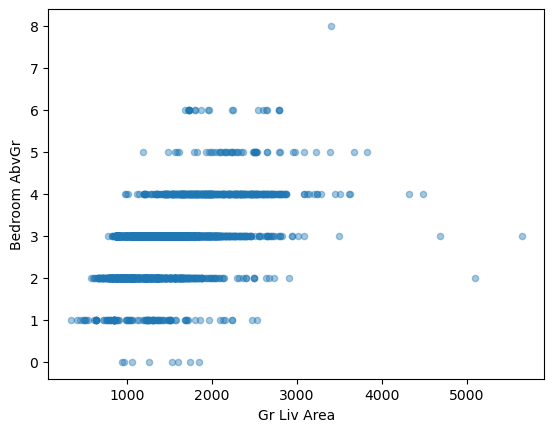

In [2]:
df.plot.scatter(x="Gr Liv Area", y="Bedroom AbvGr", alpha=0.4)
df[["Gr Liv Area", "Bedroom AbvGr"]].corr()

# Distances between Observations

Let's define the relevant features and select the rows.

In [3]:
features = ["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]

df.loc[1707, features]

Gr Liv Area      2956
Bedroom AbvGr       5
Full Bath           2
Half Bath           1
Name: 1707, dtype: object

In [4]:
df.loc[290, features]

Gr Liv Area      2650
Bedroom AbvGr       6
Full Bath           3
Half Bath           0
Name: 290, dtype: object

Now we calculate the distance. Note that we import numpy for its square root function.

In [5]:
df.loc[2928, features]

Gr Liv Area      1389
Bedroom AbvGr       2
Full Bath           1
Half Bath           0
Name: 2928, dtype: object

In [6]:
import numpy as np
np.sqrt(
    ((df.loc[1707, features] - df.loc[290, features]) ** 2).sum()  # e.g. df.loc[1707, features] = [2000, 3, 2, 1] 
)                                                                  # e.g. df.loc[290, features]  = [1800, 2, 2, 0]
                                                                   # [2000-1800, 3-2, 2-2, 1-0] = [200, 1, 0, 1]
                                                                   #[200², 1², 0², 1²] = [40000, 1, 0, 1]
                                                                   # 40000 + 1 + 0 + 1 = 40002

np.float64(306.00490192152154)

Which houses are most similar to house #1707?

Let's calculate the distance between every house in the data set and this one.

In [7]:
diffs = df[features] - df.loc[1707, features]
diffs

Gr Liv Area Bedroom AbvGr Full Bath Half Bath
0          -1300            -2        -1        -1
1          -2060            -3        -1        -1
2          -1627            -2        -1         0
3           -846            -2         0         0
4          -1327            -2         0         0
...          ...           ...       ...       ...
2925       -1953            -2        -1        -1
2926       -2054            -3        -1        -1
2927       -1986            -2        -1        -1
2928       -1567            -3        -1        -1
2929        -956            -2         0         0

[2930 rows x 4 columns]

In [8]:
dists = (diffs ** 2).sum(axis="columns")
dists

0       1690006
1       4243611
2       2647134
3        715720
4       1760933
         ...   
2925    3814215
2926    4218927
2927    3944202
2928    2455500
2929     913940
Length: 2930, dtype: object

In [9]:
dists.sort_values()

1707          0
2336        126
1182        149
160         484
565        2405
         ...   
2880    6130597
907     6340342
1302    6497419
1901    6874902
1498    7214600
Length: 2930, dtype: object

In [10]:
df.loc[[1707, 2336, 1182, 160, 565]]

PID  Gr Liv Area  Bedroom AbvGr  Full Bath  Half Bath  \
1707  528150110         2956              5          2          1   
2336  527216050         2945              3          3          1   
1182  533350090         2944              3          2          2   
160   535425010         2978              5          2          1   
565   533206020         3005              3          2          1   

      MS SubClass MS Zoning  Lot Frontage  Lot Area Street  ... Pool Area  \
1707           60        RL          99.0     13069   Pave  ...         0   
2336           60        RL          66.0     13682   Pave  ...         0   
1182           60        RL           NaN     24572   Pave  ...         0   
160            80        RL          96.0     11275   Pave  ...         0   
565           160        FV          32.0      2880   Pave  ...         0   

     Pool QC Fence Misc Feature Misc Val Mo Sold Yr Sold Sale Type  \
1707     NaN   NaN          NaN        0       8    2007       WD    
2336     NaN   NaN          NaN        0      10    2006       New   
1182     NaN   NaN          NaN        0       6    2008       WD    
160      NaN   NaN          NaN        0       6    2010       WD    
565      NaN   NaN          NaN        0       7    2009       WD    

     Sale Condition SalePrice  
1707         Normal    342000  
2336        Partial    438780  
1182         Family    150000  
160          Normal    242000  
565          Normal    280750  

[5 rows x 81 columns]

Intuitively, it seems that house #160 is more similar to #1707 than #2336. Why did house #2336 have a smaller distance?

# Scaling

In [12]:
df_standardized = ((df[features] - df[features].mean(axis="rows")) /
                   df[features].std(axis="rows"))
df_standardized

Gr Liv Area  Bedroom AbvGr  Full Bath  Half Bath
0        0.309212       0.176064  -1.024618  -0.755074
1       -1.194223      -1.032058  -1.024618  -0.755074
2       -0.337661       0.176064  -1.024618   1.234464
3        1.207317       0.176064   0.783894   1.234464
4        0.255801       0.176064   0.783894   1.234464
...           ...            ...        ...        ...
2925    -0.982555       0.176064  -1.024618  -0.755074
2926    -1.182354      -1.032058  -1.024618  -0.755074
2927    -1.047836       0.176064  -1.024618  -0.755074
2928    -0.218968      -1.032058  -1.024618  -0.755074
2929     0.989715       0.176064   0.783894   1.234464

[2930 rows x 4 columns]

<Axes: xlabel='Gr Liv Area', ylabel='Bedroom AbvGr'>

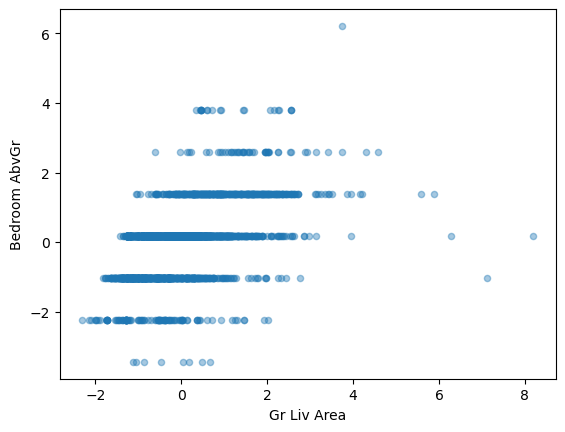

In [13]:
df_standardized.plot.scatter(
    x="Gr Liv Area", y="Bedroom AbvGr", alpha=0.4)

In [14]:
import numpy as np
diffs = df_standardized - df_standardized.loc[1707]
dists = np.sqrt((diffs ** 2).sum(axis="columns"))
dists.sort_values()

1707    0.000000
160     0.043521
909     0.249254
585     0.625113
2592    0.625113
          ...   
2880    8.024014
1385    8.050646
2279    8.095655
158     8.225392
2723    8.313887
Length: 2930, dtype: float64

# Calculating Distances in Scikit-Learn

Let's repeat the above analysis, but using the library Scikit-Learn.

In [15]:
from sklearn.preprocessing import StandardScaler

# Define the scaler.
scaler = StandardScaler()

# This calculates the mean and standard deviation of each variable.
scaler.fit(df[features])

# This actually does the scaling.
array_standardized = scaler.transform(df[features])
array_standardized

array([[ 0.30926506,  0.17609421, -1.02479289, -0.75520269],
       [-1.19442705, -1.03223376, -1.02479289, -0.75520269],
       [-0.33771825,  0.17609421, -1.02479289,  1.23467491],
       ...,
       [-1.04801492,  0.17609421, -1.02479289, -0.75520269],
       [-0.21900572, -1.03223376, -1.02479289, -0.75520269],
       [ 0.9898836 ,  0.17609421,  0.7840283 ,  1.23467491]])

In [16]:
from sklearn.metrics import pairwise_distances

dists = pairwise_distances(array_standardized[[1707]], array_standardized)
dists

array([[4.43704819, 6.08145351, 4.41300228, ..., 5.33963844, 5.4757908 ,
        3.06886734]])

In [17]:
dists[0].argsort()

array([1707,  160,  909, ..., 2279,  158, 2723])

We can also get a matrix of the distances between every pair of points.

In [18]:
dist_matrix = pairwise_distances(array_standardized)
dist_matrix

array([[0.        , 1.92902733, 2.09241494, ..., 1.35727998, 1.31875946,
        2.77393016],
       [1.92902733, 0.        , 2.48064897, ..., 1.21716597, 0.97542133,
        3.66915745],
       [2.09241494, 2.48064897, 0.        , ..., 2.11284979, 2.33104312,
        2.24373812],
       ...,
       [1.35727998, 1.21716597, 2.11284979, ..., 0.        , 1.4653712 ,
        3.37408911],
       [1.31875946, 0.97542133, 2.33104312, ..., 1.4653712 , 0.        ,
        3.1863642 ],
       [2.77393016, 3.66915745, 2.24373812, ..., 3.37408911, 3.1863642 ,
        0.        ]])

Note that row #1707 of this matrix contains the dists we calculated above.

In [20]:
dist_matrix[1707]

array([4.43704819, 6.08145351, 4.41300228, ..., 5.33963844, 5.4757908 ,
       3.06886734])